# Importation des librairies

In [1]:
# OS
import sys


# WARNINGS
import warnings
warnings.filterwarnings('ignore')

# NUMPY
import numpy as np

# STATS
import scipy.stats as stats
from scipy.stats import norm, skew

# MATPLOTLIB
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline 
# plt.style.use('fivethirtyeight') 

params = {'axes.labelsize': 8, # 12
          'font.size': 8, # 12
          'legend.fontsize': 8, # 12
          'xtick.labelsize': 8, # 10
          'ytick.labelsize': 8, # 10
          'text.usetex': True,
          'figure.figsize': (10, 8)}
plt.rcParams.update(params)


# PANDAS
import pandas as pd 
pd.set_option("display.max_rows", None, "display.max_columns", None) 

# SEABORN 
import seaborn as sns
# sns.set_context("poster")
# sns.set_style("ticks")

# SCHIKIT-LEARN: PRE-PROCESSING
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # Encodage des variables catégorielles ordinales
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder # Encodage des variables catégorielles nominales
from sklearn.preprocessing import StandardScaler # Standardisation des variables numériques
from sklearn.preprocessing import MinMaxScaler # Normalisation MinMax
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer # Imputation
from sklearn.impute import KNNImputer 


# SCHIKIT-LEARN: MODELES
from sklearn import linear_model # Classe Modèle linéaire 
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso 
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor

# SCHIKIT-LEARN: VALIDATION CROISEE + OPTIMISATION
from sklearn.model_selection import train_test_split # 
from sklearn.model_selection import cross_val_score # Validation croisée pour comparaison entre modèles
from sklearn.model_selection import validation_curve # Courbe de validation: visualiser les scores lors du choix d'un hyperparamétre
from sklearn.model_selection import GridSearchCV # Tester plusieurs hyperparamètres
from sklearn.model_selection import learning_curve # Courbe d'apprentissage: visualisation des scores du train et du validation sets en fonction des quantités des données
 
## EVALUATION

from sklearn.metrics import r2_score # Coefficient R2
from sklearn.metrics import mean_absolute_error #  MAE
from sklearn.metrics import mean_squared_error  # RMSE
from sklearn.metrics import median_absolute_error # Erreur de la médiane absolue

# SCHIKIT-LEARN: PIPELINE AND TRANSFORMATEUR
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer


# Chargement des données


In [3]:
# Autre façon pour importer les données avec le module os
import os
_REP_DATA_ = 'data' 
_REP_DATA_PRIX_TRAIN_ = os.path.join(_REP_DATA_, 'ames_prices_train.csv')
_REP_DATA_PRIX_TEST_ = os.path.join(_REP_DATA_, 'ames_prices_test.csv')


data_train = pd.read_csv(_REP_DATA_PRIX_TRAIN_)
data_test = pd.read_csv(_REP_DATA_PRIX_TEST_)

# Description des données


In [5]:
# Description des variables: noms + signification
f = open(os.path.join(_REP_DATA_, 'ames_prices_description.txt'), 'r')
print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

 # Analyse exploratoire des données

In [14]:
# Nouveaux dataframes df_houses_train et df_houses_test: copie des données data_train et data_test
df_houses_train = data_train.copy()
df_houses_test = data_test.copy()

In [16]:
# Dimension de l'ensemble train
df_houses_train.shape

(1460, 81)

In [18]:
# Dimension de l'ensemble test
df_houses_test.shape

(1459, 80)

In [20]:
df_houses_train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [22]:
df_houses_test.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


L'ensemble d'apprentissage `dfPrices_train` est de dimension $n\times p =(1460 \times 81)$. Par contre celle du test est  dimension $n\times p =(1460 \times 80)$. L'ensemble test ne contient pas la colonne d'interêt `SalePrice`.

In [25]:
# Informations sur les variables du train set
df_houses_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

On remarque qu'on a des variables quantitatives (de type float), catégorielles (de type object), discrète (type int).

In [28]:
# Types de variables
print(df_houses_train.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [30]:
# Nombre de type des variables
df_houses_train.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

## Description de la variable d'intérêt

In [33]:
df_houses_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

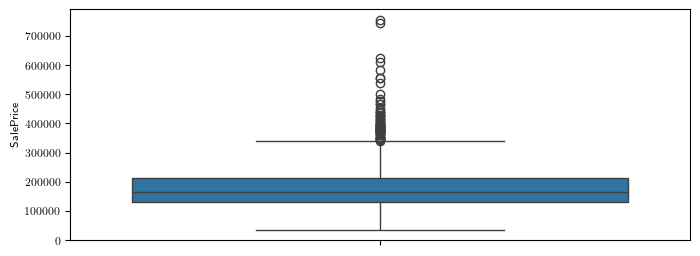

In [35]:
plt.rcParams["figure.figsize"] = (8,3)
sns.boxplot(df_houses_train['SalePrice'])
plt.show()

In [37]:
df_houses_train['SalePrice'].mean()

180921.19589041095

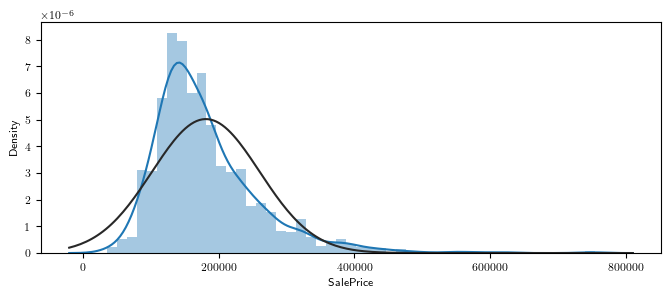

In [39]:
# Vérifier la normalité de la variable cible 
sns.distplot(df_houses_train['SalePrice'], fit=norm)
plt.show()

Les Q-Q plots sont des graphiques dit “quantile-quantile” qui permettent de comparer graphiquement la distribution d’un échantillon avec une distribution théorique (généralement la distribution Normale).

Le principe du Q-Q plot est de représenter les valeurs observées de l’échantillon sur l’axe des ordonnées, et les quantiles correspondants de la distribution théorique sur l’axe des abscisses. 
- Si les deux distributions sont similaires, les points devraient être alignés sur une droite diagonale allant du coin inférieur gauche au coin supérieur droit.
- Si l’échantillon suit exactement la distribution théorique, les points doivent tomber sur cette ligne.
- Si les points s’écartent de cette ligne, cela indique que la distribution de l’échantillon diffère de la distribution théorique.

Q-Q plot: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html

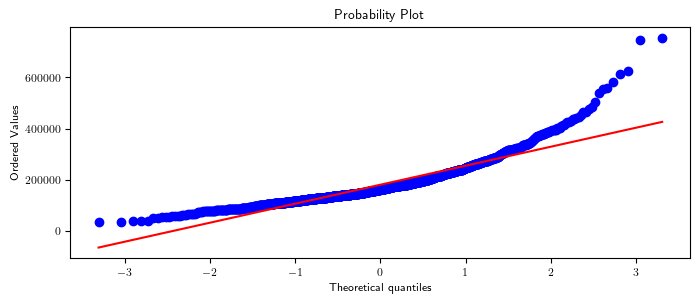

In [42]:
# Q-Q plot
fig = plt.figure()
res = stats.probplot(df_houses_train['SalePrice'], plot=plt)
plt.show()

## Relation variable cible avec des variables quantitatives

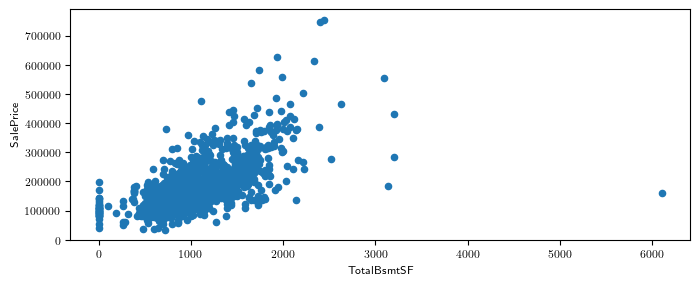

In [45]:
plt.rcParams["figure.figsize"] = (8,3)
df_houses_train.plot.scatter(x='TotalBsmtSF', y='SalePrice')
plt.show()

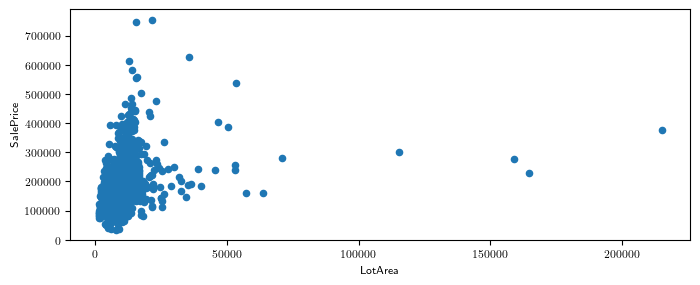

In [47]:
plt.rcParams["figure.figsize"] = (8,3)
df_houses_train.plot.scatter(x='LotArea', y='SalePrice')
plt.show()

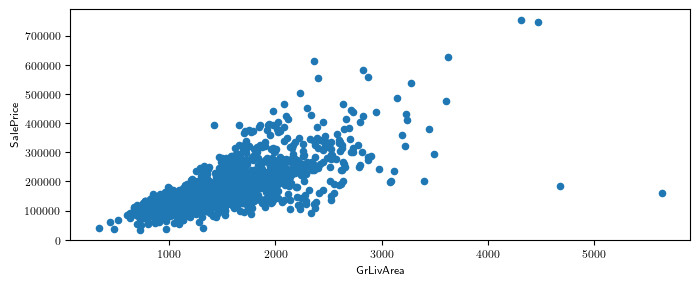

In [49]:
plt.rcParams["figure.figsize"] = (8,3)
df_houses_train.plot.scatter(x='GrLivArea', y='SalePrice')
plt.show()

## Relation variable cible avec des variables catégorielles

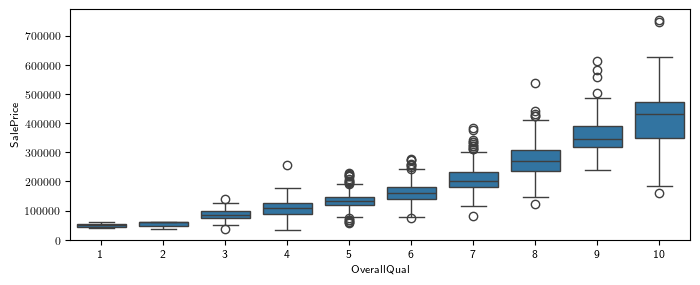

In [52]:
plt.rcParams["figure.figsize"] = (8,3)
sns.boxplot(x='OverallQual', y='SalePrice', data=df_houses_train)
plt.show()

In [54]:
plt.figure(figsize=(24, 4))
sns.boxplot(x='YearBuilt', y='SalePrice', data=df_houses_train);
plt.xticks(rotation=90);

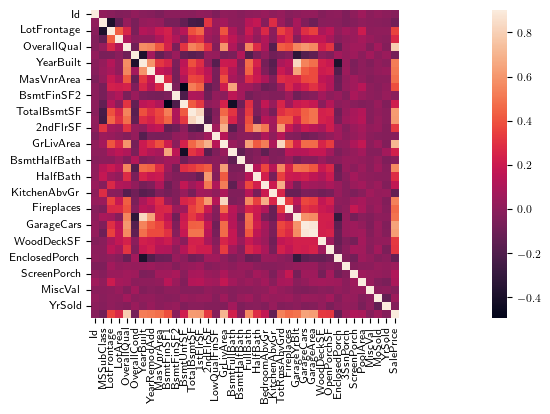

In [55]:
# Matrice de corrélation
plt.rcParams["figure.figsize"] = (12, 8)
corrmat = df_houses_train.corr(numeric_only=True)
sns.heatmap(corrmat, annot=False, cbar=True, square=True, vmax=.9) # très utile
plt.show()

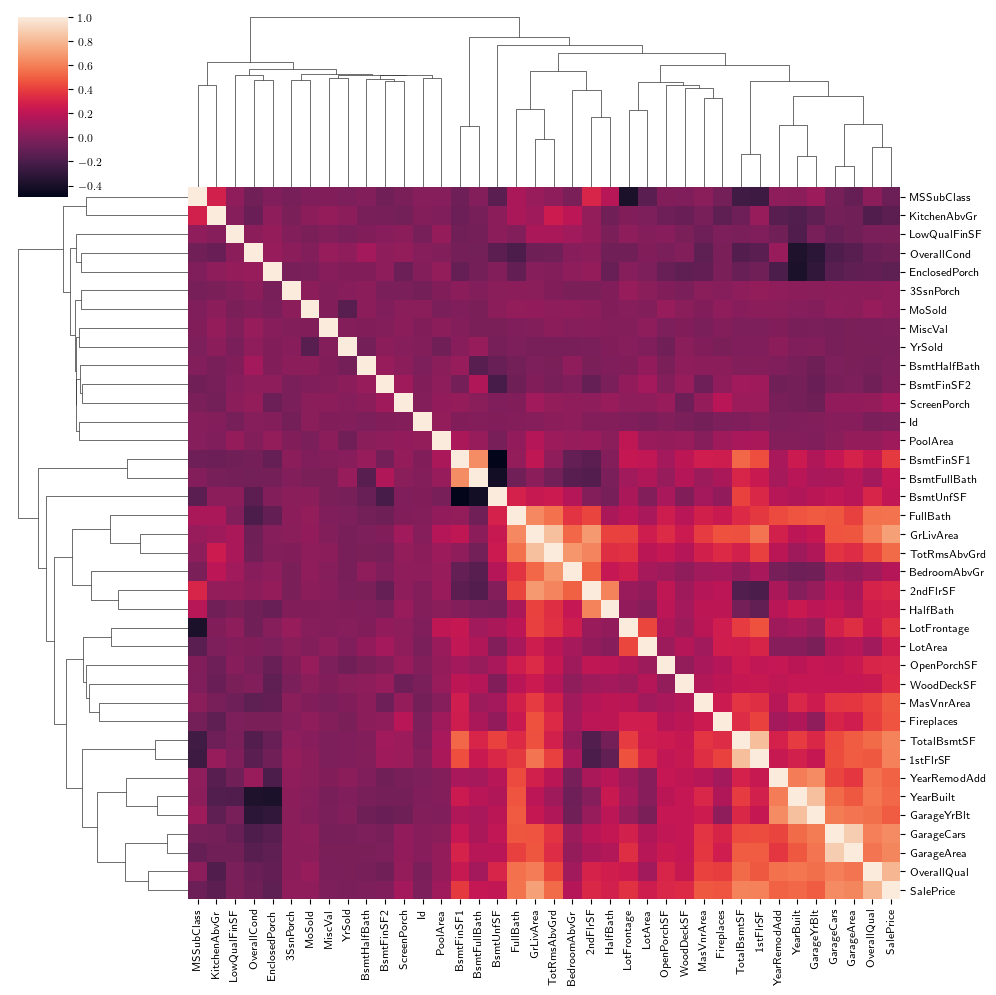

In [57]:
plt.rcParams["figure.figsize"] = (8, 3)
sns.clustermap(corrmat)
plt.show()

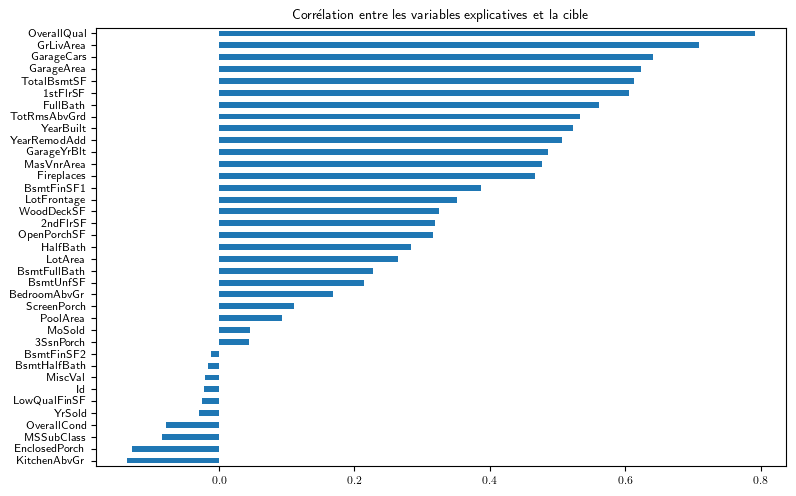

In [59]:
plt.rcParams["figure.figsize"] = (8, 5)
corrmat['SalePrice'].sort_values(ascending=True)[:-1].plot(kind='barh')
plt.title("Corrélation entre les variables explicatives et la cible")
plt.tight_layout()
plt.show()

## Log transformation de la variable cible


In [62]:
print("Skewness: %f" %df_houses_train['SalePrice'].skew())
print("kurtosis: %f" %df_houses_train['SalePrice'].kurt())

Skewness: 1.882876
kurtosis: 6.536282


- Le coefficient d'asymétrie (skewness en anglais) correspond à une mesure de l’asymétrie de la distribution d’une variable aléatoire réelle.

- Un coefficient positif indique une distribution décalée à gauche de la médiane, et donc une queue de distribution étalée vers la droite.

- Le kurtosis est coefficient d’aplatissement: si i lest positif alors les échantillons ayant des extrémités plus épaisses que la normale, impliquant des valeurs anormales plus fréquente. négatif: la distribution est relativement « aplatie »

In [66]:
df_houses_train['SalePrice'] = data_train['SalePrice']

Le test de Kolmogorov-Smirnov (K-S) est l’un des tests d’adéquation non paramétriques les plus courants. Ce test permet d'estimer si le caractère d'un échantillon est distribué de façon comparable à celui d'un autre ou s'il peut être approximé par une loi de probabilité connue.

L’hypothèse nulle est: $H_0$ : la loi $P$ a la même fonction de répartition $F$ qu’une loi continue donnée.

In [69]:
from scipy.stats import kstest
loc, scale = norm.fit(df_houses_train['SalePrice'])
n = norm(loc=loc, scale=scale)
kstest(df_houses_train['SalePrice'],  n.cdf)

KstestResult(statistic=0.12366990729158056, pvalue=6.402139779190053e-20, statistic_location=190000, statistic_sign=1)

Nous choisissions le seuil de signification est $\alpha = 1\%$. La valeur $\alpha$ correspond à la probabilité d'accepter l'hypothèse $H_0$ : la variable target suit une loi normale. la p-valeur est inférieure à notre seuil de $0,01$, nous rejetons donc l'hypothèse nulle

In [72]:
# Log transform
df_houses_train['SalePrice'] = np.log1p(df_houses_train['SalePrice'])

In [74]:
from scipy.stats import kstest
loc, scale = norm.fit(df_houses_train['SalePrice'])
n = norm(loc=loc, scale=scale)
kstest(df_houses_train['SalePrice'],  n.cdf)

KstestResult(statistic=0.040868035534021296, pvalue=0.014814446691932694, statistic_location=12.154784614286667, statistic_sign=1)

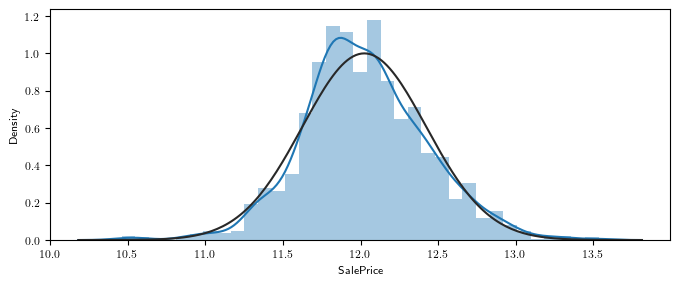

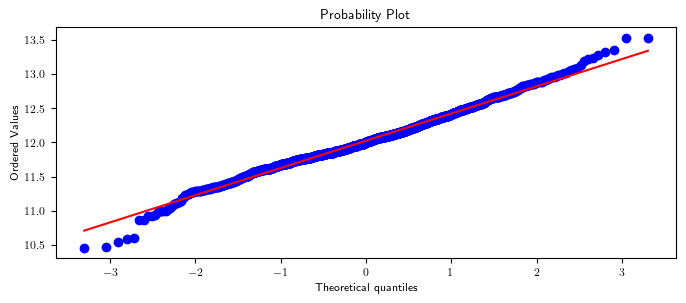

In [76]:
plt.rcParams["figure.figsize"] = (8,3)
sns.distplot(df_houses_train['SalePrice'], fit=norm)

# Q-Q plot
fig = plt.figure()
res = stats.probplot(df_houses_train['SalePrice'], plot=plt)
plt.show()

# Pré-traitement

In [79]:
# Supprimer la colonne ID

df_houses_train.drop('Id', axis=1, inplace=True)
df_houses_test.drop('Id', axis=1, inplace=True)

## Outliers

In [82]:
continFeatures_train = df_houses_train.select_dtypes(include=['float64', 'int64']).columns
for feature in continFeatures_train:
    Q1 = df_houses_train[feature].quantile(0.05)
    Q3 = df_houses_train[feature].quantile(0.75)
    IQR = Q3 - Q1
    df_houses_train_IQR = df_houses_train[(df_houses_train[feature] >= Q1 - 1.5*IQR) & (df_houses_train[feature] <= Q3 + 1.5*IQR)]
    

df_houses_train_IQR.shape, data_train.shape # (1460, 81)

((1460, 80), (1460, 81))

In [84]:
# Concatenation du train set et test set 
all_data = pd.concat(
    (df_houses_train.loc[:,'MSSubClass':'SaleCondition'],
     df_houses_test.loc[:,'MSSubClass':'SaleCondition'])
)

In [86]:
# Taille de l'échantillon totale
all_data.shape

(2919, 79)

## Valeurs manquantes


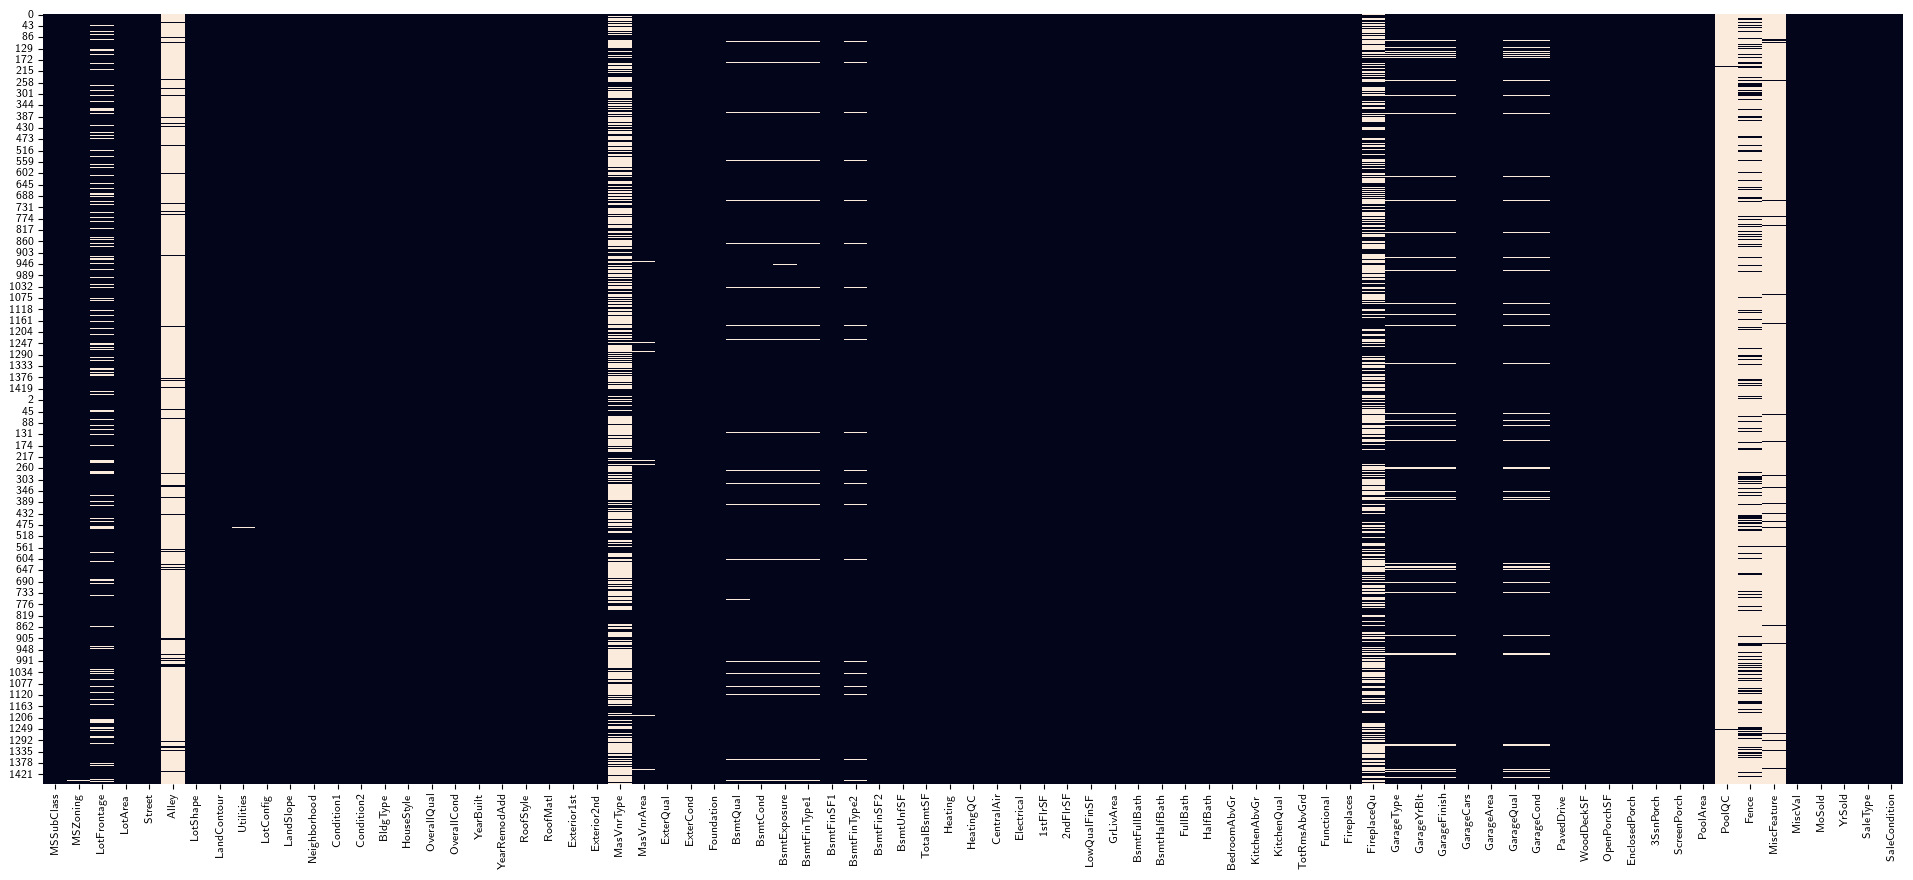

In [89]:
# Valeurs manquantes
plt.figure(figsize=(24, 10))
sns.heatmap(all_data.isna(), cbar=False)
plt.show()

Pour détecter des motifs remaruqables dans les valeurs manquantes, nous pouvons aussi utiliser la librairie nommé missingno.

In [91]:
import missingno as msno
# msno.matrix(all_data._get_numeric_data())
# plt.show()

In [92]:
# Pourcentage de données non manquantes avec missingno 
# msno.bar(all_data[:1])
# msno.bar(all_data[1:])
# plt.show()

In [96]:
# msno.heatmap(all_data._get_numeric_data())
# plt.show()

In [99]:
df_missvalues = pd.DataFrame(
                           (round(100* all_data.isnull().sum()/len(all_data), 2)), 
                           columns=['pourcentage de vals manquantes']
                           )
df_missvalues.sort_values(by=['pourcentage de vals manquantes'], ascending=False).head(20)

,pourcentage de vals manquantes
PoolQC,99.66
MiscFeature,96.40
Alley,93.22
Fence,80.44
MasVnrType,60.50
FireplaceQu,48.65
LotFrontage,16.65
GarageYrBlt,5.45
GarageFinish,5.45
GarageQual,5.45


In [101]:
miss_rates = all_data.isna().sum() / len(all_data)
features = all_data.columns[miss_rates  < 0.9]
features

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [103]:
all_data = all_data[features]
all_data.shape

(2919, 76)

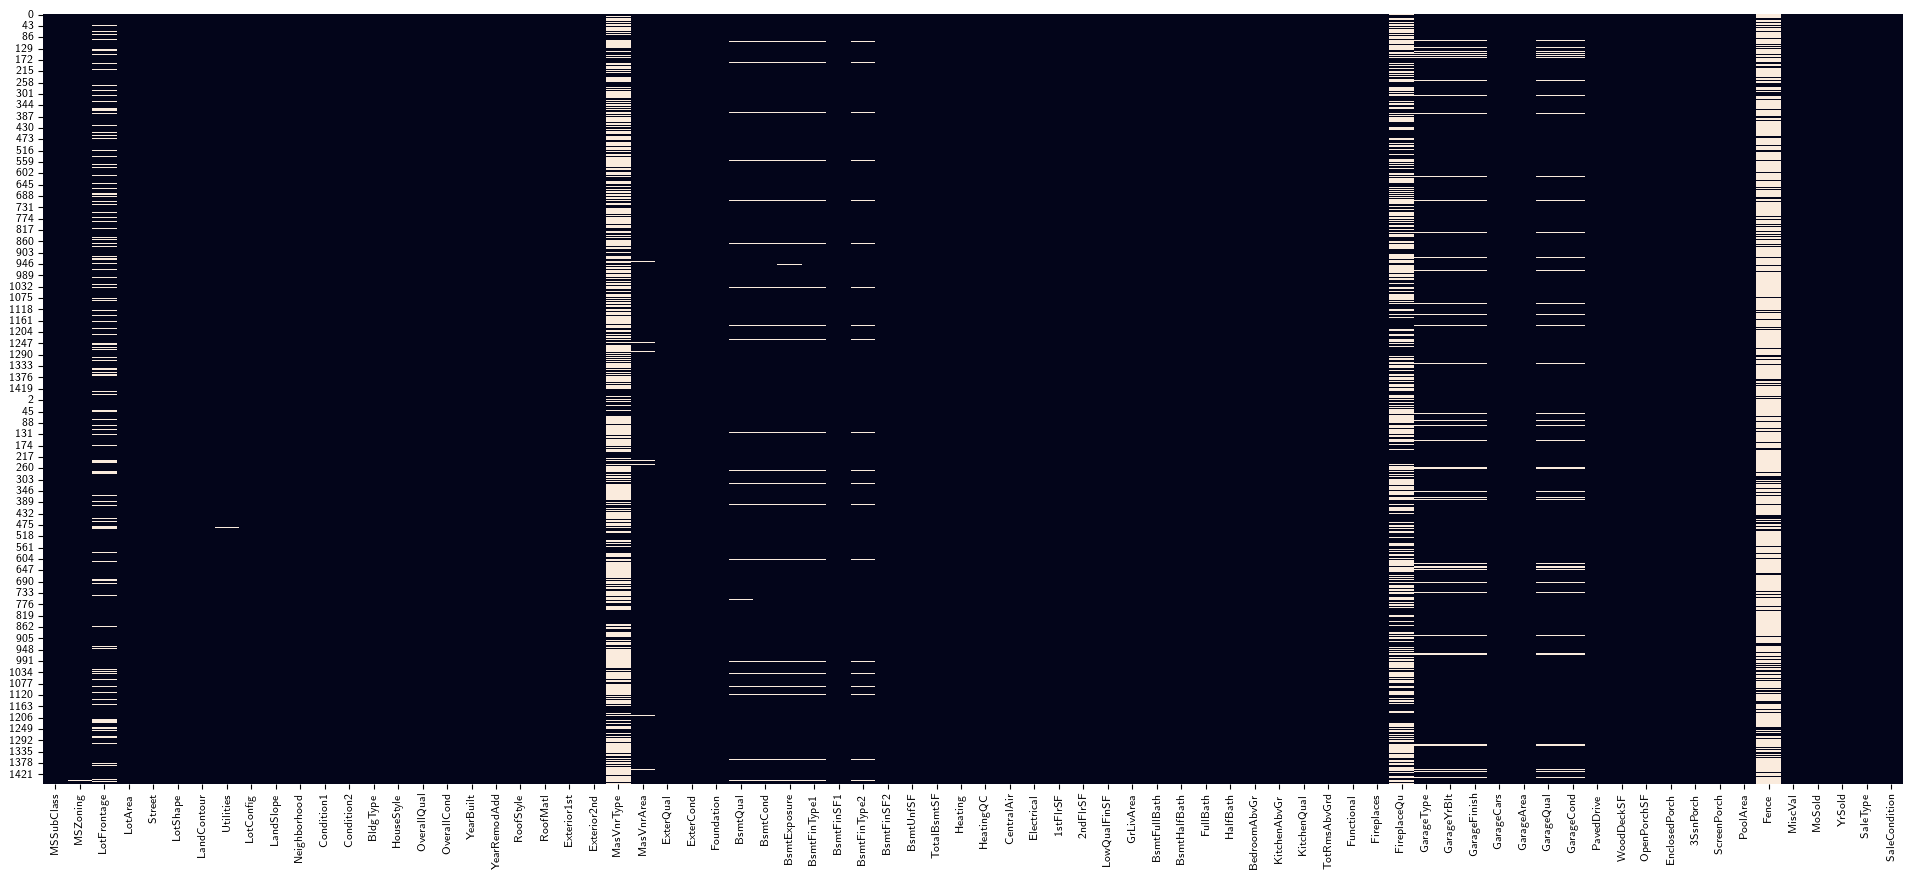

In [105]:
plt.figure(figsize=(24, 10))
sns.heatmap(all_data.isna(), cbar=False)
plt.show()

In [106]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,0,12,2008,WD,Normal


# Test 1 : pré-traitement + modélisation + évaluation

In [110]:
ntrain = df_houses_train.shape[0]
ntest = df_houses_test.shape[0]

all_data_copy = all_data.copy()
df_houses_train_copy = all_data_copy[:ntrain]
df_houses_test_copy = all_data_copy[ntrain:]

## Imputation des valeurs manquantes

In [113]:
categorical_features = all_data_copy.select_dtypes('object').columns
numeric_features = all_data_copy.select_dtypes(include=['float64', 'int64']).columns

In [115]:
categoricalImputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
numericImputer = SimpleImputer(missing_values=np.nan, strategy='mean')

for feature in categorical_features:
    df_houses_train_copy[feature] = categoricalImputer.fit_transform(df_houses_train_copy[feature].values.reshape(-1,1)).ravel() 
    df_houses_test_copy[feature] = categoricalImputer.transform(df_houses_test_copy[feature].values.reshape(-1,1)).ravel()

In [117]:
for feature in numeric_features:
    df_houses_train_copy[feature] = numericImputer.fit_transform(df_houses_train_copy[feature].values.reshape(-1,1)).ravel()  
    df_houses_test_copy[feature] = numericImputer.transform(df_houses_test_copy[feature].values.reshape(-1,1)).ravel() 

In [119]:
encoder = LabelEncoder()
for feature in categorical_features:
    df_houses_train_copy[feature] = encoder.fit_transform(df_houses_train_copy[feature])
    df_houses_test_copy[feature] = encoder.transform(df_houses_test_copy[feature])

# Normalisation

In [122]:
scaleStd = StandardScaler()
# scaleMinmax = MinMaxScaler()
for col in numeric_features:
    df_houses_train_copy[feature] = scaleStd.fit_transform(df_houses_train_copy[feature].values.reshape(-1,1)).ravel()
    df_houses_test_copy[feature] = scaleStd.transform(df_houses_test_copy[feature].values.reshape(-1,1)).ravel()

## Séparer de nouveau en train set et test set



In [125]:
df_houses_train_copy.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60.0,3,65.0,8450.0,1,3,3,0,4,0,5,2,2,0,5,7.0,5.0,2003.0,2003.0,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706.0,5,0.0,150.0,856.0,1,0,1,4,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,2,8.0,6,0.0,2,1,2003.0,1,2.0,548.0,4,4,2,0.0,61.0,0.0,0.0,0.0,0.0,2,0.0,2.0,2008.0,8,0.208502
1,20.0,3,80.0,9600.0,1,3,3,0,2,0,24,1,2,0,2,6.0,8.0,1976.0,1976.0,1,1,8,8,1,0.0,3,4,1,2,3,1,0,978.0,5,0.0,284.0,1262.0,1,0,1,4,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,3,6.0,6,1.0,4,1,1976.0,1,2.0,460.0,4,4,2,298.0,0.0,0.0,0.0,0.0,0.0,2,0.0,5.0,2007.0,8,0.208502
2,60.0,3,68.0,11250.0,1,0,3,0,4,0,5,2,2,0,5,7.0,5.0,2001.0,2002.0,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486.0,5,0.0,434.0,920.0,1,0,1,4,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,2,6.0,6,1.0,4,1,2001.0,1,2.0,608.0,4,4,2,0.0,42.0,0.0,0.0,0.0,0.0,2,0.0,9.0,2008.0,8,0.208502
3,70.0,3,60.0,9550.0,1,0,3,0,0,0,6,2,2,0,5,7.0,5.0,1915.0,1970.0,1,1,13,15,1,0.0,3,4,0,3,1,3,0,216.0,5,0.0,540.0,756.0,1,2,1,4,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,2,7.0,6,1.0,2,5,1998.0,2,3.0,642.0,4,4,2,0.0,35.0,272.0,0.0,0.0,0.0,2,0.0,2.0,2006.0,8,-3.426284
4,60.0,3,84.0,14260.0,1,0,3,0,2,0,15,2,2,0,5,8.0,5.0,2000.0,2000.0,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655.0,5,0.0,490.0,1145.0,1,0,1,4,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,2,9.0,6,1.0,4,1,2000.0,1,3.0,836.0,4,4,2,192.0,84.0,0.0,0.0,0.0,0.0,2,0.0,12.0,2008.0,8,0.208502


In [127]:
df_houses_test_copy.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20.0,2,80.0,11622.0,1,3,3,0,4,0,12,1,2,0,2,5.0,6.0,1961.0,1961.0,1,1,12,13,1,0.0,3,4,1,3,3,3,4,468.0,3,144.0,270.0,882.0,1,4,1,4,896.0,0.0,0.0,896.0,0.0,0.0,1.0,0.0,2.0,1.0,3,5.0,6,0.0,2,1,1961.0,2,1.0,730.0,4,4,2,140.0,0.0,0.0,0.0,120.0,0.0,2,0.0,6.0,2010.0,8,0.208502
1,20.0,3,81.0,14267.0,1,0,3,0,0,0,12,2,2,0,2,6.0,6.0,1958.0,1958.0,3,1,13,14,1,108.0,3,4,1,3,3,3,0,923.0,5,0.0,406.0,1329.0,1,4,1,4,1329.0,0.0,0.0,1329.0,0.0,0.0,1.0,1.0,3.0,1.0,2,6.0,6,0.0,2,1,1958.0,2,1.0,312.0,4,4,2,393.0,36.0,0.0,0.0,0.0,0.0,2,12500.0,6.0,2010.0,8,0.208502
2,60.0,3,74.0,13830.0,1,0,3,0,4,0,8,2,2,0,5,5.0,5.0,1997.0,1998.0,1,1,12,13,1,0.0,3,4,2,2,3,3,2,791.0,5,0.0,137.0,928.0,1,2,1,4,928.0,701.0,0.0,1629.0,0.0,0.0,2.0,1.0,3.0,1.0,3,6.0,6,1.0,4,1,1997.0,0,2.0,482.0,4,4,2,212.0,34.0,0.0,0.0,0.0,0.0,2,0.0,3.0,2010.0,8,0.208502
3,60.0,3,78.0,9978.0,1,0,3,0,4,0,8,2,2,0,5,6.0,6.0,1998.0,1998.0,1,1,12,13,1,20.0,3,4,2,3,3,3,2,602.0,5,0.0,324.0,926.0,1,0,1,4,926.0,678.0,0.0,1604.0,0.0,0.0,2.0,1.0,3.0,1.0,2,7.0,6,1.0,2,1,1998.0,0,2.0,470.0,4,4,2,360.0,36.0,0.0,0.0,0.0,0.0,2,0.0,6.0,2010.0,8,0.208502
4,120.0,3,43.0,5005.0,1,0,1,0,4,0,22,2,2,4,2,8.0,5.0,1992.0,1992.0,1,1,6,6,1,0.0,2,4,2,2,3,3,0,263.0,5,0.0,1017.0,1280.0,1,0,1,4,1280.0,0.0,0.0,1280.0,0.0,0.0,2.0,0.0,2.0,1.0,2,5.0,6,0.0,2,1,1992.0,1,2.0,506.0,4,4,2,0.0,82.0,0.0,0.0,144.0,0.0,2,0.0,1.0,2010.0,8,0.208502


In [129]:
ntrain = df_houses_train.shape[0]
ntest = df_houses_test.shape[0]

X_train = df_houses_train_copy
X_test = df_houses_test_copy
y_train = df_houses_train['SalePrice']

In [131]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60.0,3,65.0,8450.0,1,3,3,0,4,0,5,2,2,0,5,7.0,5.0,2003.0,2003.0,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706.0,5,0.0,150.0,856.0,1,0,1,4,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,2,8.0,6,0.0,2,1,2003.0,1,2.0,548.0,4,4,2,0.0,61.0,0.0,0.0,0.0,0.0,2,0.0,2.0,2008.0,8,0.208502
1,20.0,3,80.0,9600.0,1,3,3,0,2,0,24,1,2,0,2,6.0,8.0,1976.0,1976.0,1,1,8,8,1,0.0,3,4,1,2,3,1,0,978.0,5,0.0,284.0,1262.0,1,0,1,4,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,3,6.0,6,1.0,4,1,1976.0,1,2.0,460.0,4,4,2,298.0,0.0,0.0,0.0,0.0,0.0,2,0.0,5.0,2007.0,8,0.208502
2,60.0,3,68.0,11250.0,1,0,3,0,4,0,5,2,2,0,5,7.0,5.0,2001.0,2002.0,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486.0,5,0.0,434.0,920.0,1,0,1,4,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,2,6.0,6,1.0,4,1,2001.0,1,2.0,608.0,4,4,2,0.0,42.0,0.0,0.0,0.0,0.0,2,0.0,9.0,2008.0,8,0.208502
3,70.0,3,60.0,9550.0,1,0,3,0,0,0,6,2,2,0,5,7.0,5.0,1915.0,1970.0,1,1,13,15,1,0.0,3,4,0,3,1,3,0,216.0,5,0.0,540.0,756.0,1,2,1,4,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,2,7.0,6,1.0,2,5,1998.0,2,3.0,642.0,4,4,2,0.0,35.0,272.0,0.0,0.0,0.0,2,0.0,2.0,2006.0,8,-3.426284
4,60.0,3,84.0,14260.0,1,0,3,0,2,0,15,2,2,0,5,8.0,5.0,2000.0,2000.0,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655.0,5,0.0,490.0,1145.0,1,0,1,4,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,2,9.0,6,1.0,4,1,2000.0,1,3.0,836.0,4,4,2,192.0,84.0,0.0,0.0,0.0,0.0,2,0.0,12.0,2008.0,8,0.208502


In [133]:
X_train.shape, X_test.shape

((1460, 76), (1459, 76))

# Modélisation: régression linéaire simple

In [136]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [138]:
y_pred = linreg.predict(X_test)

In [140]:
y_pred_train = linreg.predict(X_train)


In [142]:
# help(linreg)

In [144]:
# score sur le test d'entraintement
# R2: évalue la performance du modèle par rapport au niveau de variation présent dans les données 
score = linreg.score(X_train, y_train)
score

0.8869567165087311

Rappelons que le score $R^2$ est défini par la formule :
\begin{equation}
R^2 = 1 - \frac{\sum_{i=1}^n(y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2}
\end{equation}

In [148]:
# Score sur le test d'entraintement cross-validé
score_val = cross_val_score(linreg, X_train, y_train, cv=5)
score_val

array([0.89491922, 0.85801077, 0.88491395, 0.88271224, 0.73964761])

In [150]:
score_val.mean()

0.8520407590585201

In [152]:
# RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse

0.13425647346552488

In [154]:
# MAE: valeurs abberrantes
mae = mean_absolute_error(y_train, y_pred_train)
mae

0.08967998080491935

In [156]:
# Median absolute error 
medae = median_absolute_error(y_train, y_pred_train)
medae

0.06581170011415516

In [158]:
# import sklearn as sk
# sorted(sk.metrics.SCORERS.keys())

## Analyse des résidus


- Les résidus sont  les différences entre les valeurs observées $y_i$ et les valeurs prédites $\hat{y}_i$ dans un modèle linéaire. Les résidus représentent la variation ou l'erreur inexpliquée du modèle.
  
- Le terme "résidu" fait référence à quelque chose qui reste ou qui est laissé de côté. Dans le contexte de la modélisation statistique, les résidus sont les différences restantes entre les points de données réels et les valeurs prédites sur la base du modèle. Ils représentent les parties des données que le modèle n'a pas pu prendre en compte.
  
- En analysant les résidus, nous pouvons évaluer la qualité de l'ajustement du modèle aux données : si les résidus présentent un profil aléatoire autour de zéro et une variance constante, cela suggère que le modèle capture de manière adéquate les relations sous-jacentes dans les données. En revanche, si les résidus présentent des profil ou des tendances, cela indique que le modèle peut manquer d'informations ou d'hypothèses importantes.
L'analyse des résidus est un élément essentiel de la validation du modèle linéaire gaussien, car elle permet d'identifier des problèmes potentiels tels que l'hétéroscédasticité, l'autocorrélation ou des points de données influents. En comprenant les résidus et leurs modèles, nous pouvons mieux comprendre les limites du modèle et apporter les améliorations nécessaires pour accroître sa précision et sa fiabilité.

In [162]:
residual = y_train - y_pred_train

sns.residplot(data=None, x=y_pred_train, y=residual, color='darkorange')
plt.xlabel("y_predict")
plt.ylabel("Residuals")
plt.title("Residual Plot")

Text(0.5, 1.0, 'Residual Plot')

In [164]:
# Distribution des erreurs
# hist_erreurs = np.abs(y_train - y_pred_train)
# plt.hist(hist_erreurs, bins=200)
# plt.show()

## courbe d'appprentissage

In [168]:
N, train_score, val_score = learning_curve(linreg, 
                                           X_train, 
                                           y_train, 
                                           cv=10,
#                                           scoring='neg_median_absolute_error',
                                           train_sizes=np.linspace(0.1, 1, 10)
                                           )

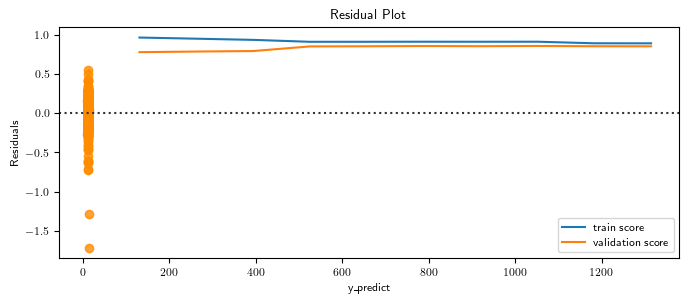

In [169]:
plt.rcParams["figure.figsize"] = (8,3)
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()
plt.show()

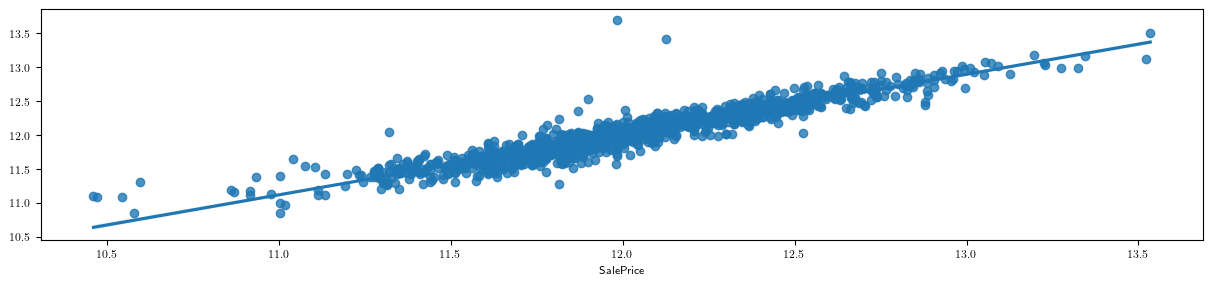

In [170]:
# Visualisation de la droite linéaire
plt.rcParams["figure.figsize"] = (15,3)
sns.regplot(x=y_train,y=y_pred_train)
plt.show()

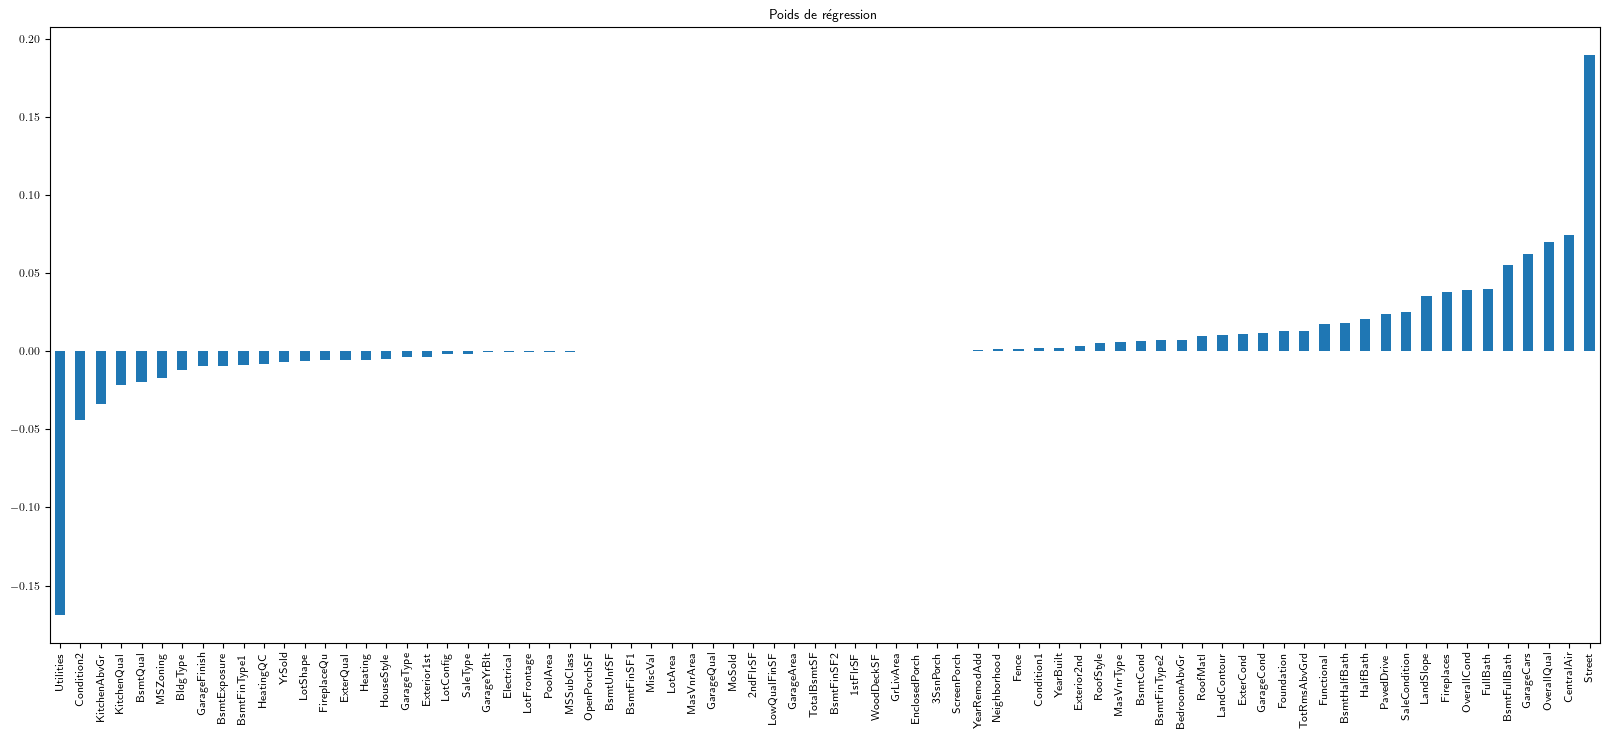

In [171]:
# Graphique des coefficients
plt.figure(figsize=(20,8))
predictors = X_train.columns
coef = pd.Series(linreg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Poids de régression')
plt.show()

In [172]:
# Predictions finales
predictions_linreg = np.exp(linreg.predict(X_test)) - 1

In [173]:
predictions_linreg

array([116304.27174378, 150036.68770604, 165828.82377494, ...,
       152694.89700354, 120997.05246955, 242685.71601649])

# Pipelines

In [176]:
ntrain = df_houses_train.shape[0]
ntest = df_houses_test.shape[0]

all_data_copy = all_data.copy()
df_houses_train_copy = all_data_copy[:ntrain]
df_houses_test_copy = all_data_copy[ntrain:]

X_train = df_houses_train_copy
X_test = df_houses_test_copy

In [178]:
categoricalPipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),
                                   OneHotEncoder()
                                  )

numericPipeline = make_pipeline(SimpleImputer(), 
                                   StandardScaler()
                                  )

In [180]:
preprocessor = make_column_transformer(
    (categoricalPipeline, categorical_features),
    (numericPipeline, numeric_features)
)

In [184]:
regRidge1 = make_pipeline(preprocessor, Ridge(alpha=0.06, random_state=99))
regRidge2 = make_pipeline(preprocessor, Ridge(alpha=1e-3, random_state=99))

In [187]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [191]:
regRidge1

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'Roo...
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object'))])),
                ('ridge', Ridge(alpha=0.06, random_state=99))])

In [193]:
regRidge2

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'Roo...
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object'))])),
                ('ridge', Ridge(alpha=0.001, random_state=99))])

In [195]:
regRidge1.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'Roo...
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object'))])),
                ('ridge', Ridge(alpha=0.06, random_state=99))])

In [197]:
regRidge1.score(X_train, y_train)

0.9429029894163348

In [199]:
regRidge2.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'Roo...
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object'))])),
                ('ridge', Ridge(alpha=0.001, random_state=99))])

In [201]:
regRidge2.score(X_train, y_train)

0.9431376023344495

In [203]:
# Tracer les coefficients en fonction de $\lambda$

n_lambdas = 50
lambdas = np.linspace(1e-6, 1., n_lambdas)

coefs = []
for lambda_ in lambdas:
    ridge_pipeline = make_pipeline(preprocessor, Ridge(alpha=lambda_, random_state=99))
    ridge_pipeline.fit(X_train, y_train)
    coef = ridge_pipeline.named_steps['ridge'].coef_
    coefs.append(coef)

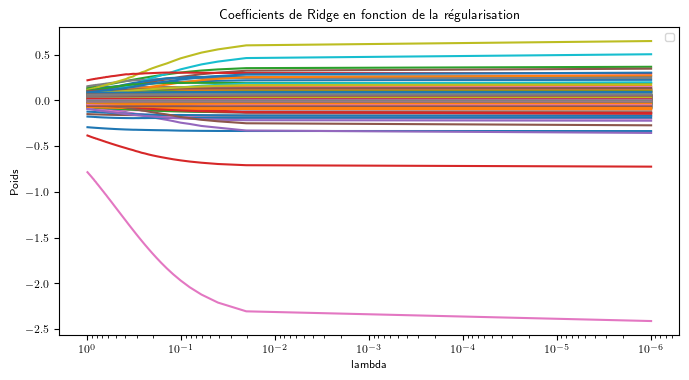

In [267]:
plt.rcParams["figure.figsize"] = (8,4)
ax = plt.gca()

ax.plot(lambdas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("lambda")
plt.ylabel("Poids")
plt.title("Coefficients de Ridge en fonction de la régularisation")
plt.axis("tight")
plt.legend()
plt.show()

# Hyper-optimisation : grille de recherche pour la régression ridge

In [207]:
from sklearn.preprocessing import PolynomialFeatures

categoricalPipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),
                                   OneHotEncoder()
                                  )

numericPipeline_PF = make_pipeline(SimpleImputer(), 
                                PolynomialFeatures(),
                                   StandardScaler()
                                  )

preprocessor_grid = make_column_transformer(
    (categoricalPipeline, categorical_features),
    (numericPipeline_PF, numeric_features)
)

In [208]:
model_ridge = make_pipeline(preprocessor_grid, 
                      Ridge(random_state=99))
model_ridge 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'Roo...
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object'))])),
                ('ridge', Ridge(random_state=99))])

In [209]:
params = {'ridge__alpha': [0.0001, 0.001, 0.01, 0.1, 1.]}

grid_ridge = GridSearchCV(estimator=model_ridge, param_grid=params, cv=5)

grid_ridge

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder())]),
                                                                         Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',...
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object'))])),
                                       ('ridge', Ridge(random_state=99))]),
             param_grid={'ridge__alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]})

In [210]:
grid_ridge.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder())]),
                                                                         Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',...
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object'))])),
                                       ('ridge', Ridge(random_state=99))]),
             param_grid={'ridge__alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]})

In [211]:
grid_ridge.best_params_

{'ridge__alpha': 0.0001}

In [212]:
mean_absolute_error(y_train, grid_ridge.predict(X_train))

0.043545170450148614

In [213]:
best_ridge = grid_ridge.best_estimator_
mean_absolute_error(y_train, best_ridge.predict(X_train))

0.043545170450148614

In [215]:
r2_score(y_train, best_ridge.predict(X_train))

0.9770369041530603

In [219]:
rmse_ridge_gscv = np.sqrt(mean_squared_error(y_train, best_ridge.predict(X_train)))
rmse_ridge_gscv

0.060510128158296726

In [221]:
##  Courbe des lambdas

In [222]:
lambda_list = list(np.linspace(1e-6, 1., 100))

rmses_ridge = []
for lambda_ in lambda_list:
    
    model_ridge_lambda_ = make_pipeline(preprocessor, Ridge(alpha=lambda_, random_state=99))
    model_ridge_lambda_.fit(X_train, y_train)
    y_train_pred = model_ridge_lambda_.predict(X_train)
    score_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    # score = model_ridge_lambda_.score(X_train, y_train)
    # model_ridge_lambda_  = Pipeline([('transformer', preprocessor), ('estimator', Ridge(alpha=lambda_, random_state=99))])
    # score = cross_val_score(model_ridge_lambda_, X_train, y_train, scoring="neg_root_mean_squared_error", cv=5).mean()
    # print(score)
    rmses_ridge.append(score_rmse)
rmses_ridge = pd.Series(rmses_ridge, index=lambda_list)
rmses_ridge.plot(title="RMSE par lambda")
plt.xlabel("Lambda")
plt.ylabel("RMSE")

print("Meilleur lambda:", rmses_ridge.idxmin())
print("RMSLE:", rmses_ridge.min())

Meilleur lambda: 1e-06
RMSLE: 0.09522200636387328


# Support Vector Machines

In [224]:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
# class sklearn.svm.SVR(*, kernel='rbf', degree=3, gamma='scale', 
# coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)[source]

In [225]:
categoricalPipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),
                                   OneHotEncoder()
                                  )

numericPipeline = make_pipeline(SimpleImputer(), 
                                   RobustScaler()
                                  )

preprocessor_robust = make_column_transformer(
    (categoricalPipeline, categorical_features),
    (numericPipeline, numeric_features)
)


In [226]:
svr_pipe = make_pipeline(preprocessor_robust,
                      SVR(C= 20, epsilon= 0.008, gamma=0.0003, verbose=1))
svr_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'Roo...
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object'))])),
                ('svr', SVR(C=20, epsilon=0.008, gamma=0.0003, verbose=1))])

In [227]:
svr_pipe.fit(X_train, y_train)

[LibSVM]......*....*.*
optimization finished, #iter = 10171
obj = -1526.289806, rho = -11.974756
nSV = 1354, nBSV = 787


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'Roo...
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object'))])),
                ('svr', SVR(C=20, epsilon=0.008, gamma=0.0003, verbose=1))])

In [228]:
svr_pipe.score(X_train, y_train)

0.9497848425362823

In [229]:
y_train_pred_svr = svr_pipe.predict(X_train)
score_rmse_svr = np.sqrt(mean_squared_error(y_train, y_train_pred_svr))
score_rmse_svr

0.08948088441072238

## SVR avec Grid search CV

In [236]:
svr = SVR(verbose=1)
svr_pipe = make_pipeline(preprocessor_robust, svr)
svr_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'Roo...
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object'))])),
                ('svr', SVR(verbose=1))])

In [239]:
svr_pipe.steps

[('columntransformer',
  ColumnTransformer(transformers=[('pipeline-1',
                                   Pipeline(steps=[('simpleimputer',
                                                    SimpleImputer(strategy='most_frequent')),
                                                   ('onehotencoder',
                                                    OneHotEncoder())]),
                                   Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
         'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
         'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
         'Ext...
         'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
         'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
         'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
         'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
         'EnclosedPorch', '3SsnPorch', 'Sc

In [240]:
param_grid = {
    'svr__kernel': ['rbf'],
    'svr__degree': [2, 3, 4],
    'svr__gamma': ['scale', 'auto'],
    'svr__C': [0.001, 0.1, 1, 10],
    'svr__epsilon': [0.001, 0.01, 0.1, 1]
}

best_grid_svr = GridSearchCV(estimator=svr_pipe, param_grid=param_grid, cv=5)
best_grid_svr

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder())]),
                                                                         Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',...
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object'))])),
                                       ('svr', SVR(verbose=1))]),
             param_grid={'svr__C': [0.001, 0.1, 1, 10],
                         'svr__degree': [2, 3, 4],
                         'svr__epsilon': [0.001, 0.01, 0.1, 1],
                         'svr__gamma': ['scale', 'auto'],
                         'svr__kernel': ['rbf']})

In [241]:
best_grid_svr.fit(X_train, y_train)

[LibSVM]*
optimization finished, #iter = 628
obj = -0.359848, rho = -11.991139
nSV = 1164, nBSV = 1164
[LibSVM]*
optimization finished, #iter = 630
obj = -0.351597, rho = -11.988439
nSV = 1166, nBSV = 1166
[LibSVM]*
optimization finished, #iter = 624
obj = -0.358750, rho = -12.003594
nSV = 1167, nBSV = 1165
[LibSVM]*
optimization finished, #iter = 634
obj = -0.364697, rho = -12.002189
nSV = 1164, nBSV = 1164
[LibSVM]*
optimization finished, #iter = 630
obj = -0.361308, rho = -11.992624
nSV = 1168, nBSV = 1168
[LibSVM]*
optimization finished, #iter = 584
obj = -0.351947, rho = -11.976056
nSV = 1166, nBSV = 1166
[LibSVM]*
optimization finished, #iter = 590
obj = -0.344894, rho = -11.979721
nSV = 1168, nBSV = 1166
[LibSVM]*
optimization finished, #iter = 586
obj = -0.350845, rho = -11.981022
nSV = 1164, nBSV = 1162
[LibSVM]*
optimization finished, #iter = 588
obj = -0.357012, rho = -11.981543
nSV = 1162, nBSV = 1162
[LibSVM]*
optimization finished, #iter = 586
obj = -0.353352, rho = -11.9

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder())]),
                                                                         Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',...
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object'))])),
                                       ('svr', SVR(verbose=1))]),
             param_grid={'svr__C': [0.001, 0.1, 1, 10],
                         'svr__degree': [2, 3, 4],
                         'svr__epsilon': [0.001, 0.01, 0.1, 1],
                         'svr__gamma': ['scale', 'auto'],
                         'svr__kernel': ['rbf']})

In [242]:
best_grid_svr.best_params_

{'svr__C': 0.001,
 'svr__degree': 2,
 'svr__epsilon': 0.001,
 'svr__gamma': 'scale',
 'svr__kernel': 'rbf'}

In [243]:
svr_reg = best_grid_svr.best_estimator_

In [244]:
rmse_svr_gscv = np.sqrt(mean_squared_error(y_train, svr_reg.predict(X_train)))
r2_svr_gscv = r2_score(y_train, svr_reg.predict(X_train))
mae_svr_gscv = mean_absolute_error(y_train, svr_reg.predict(X_train))

In [245]:
rmse_svr_gscv, r2_svr_gscv, mae_svr_gscv

(0.39850281697742085, 0.004051035296731675, 0.30775616897170394)

In [246]:
print(svr_reg)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'Roo...
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF'

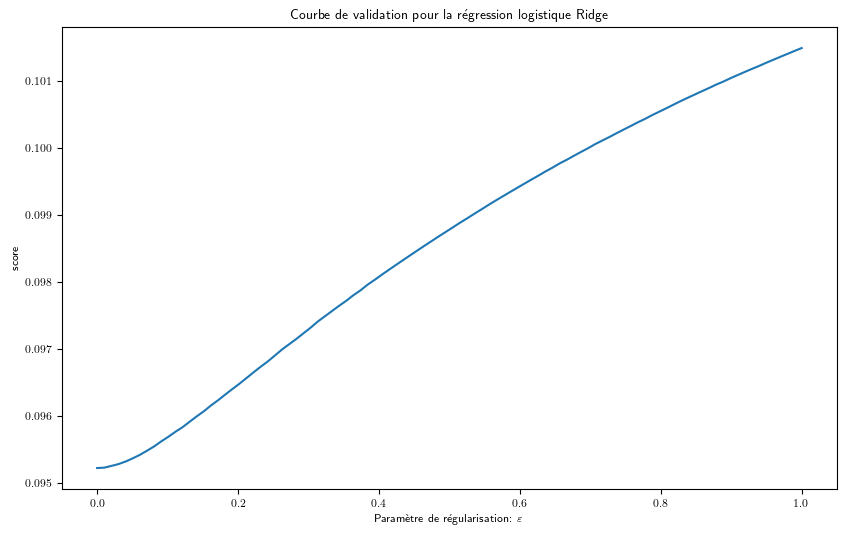

In [247]:
from sklearn.model_selection import ValidationCurveDisplay

list_epsilons = [0.001, 0.01, 0.1, 1]
# alidationCurveDisplay.from_estimator(
   # svr_reg.named_steps['svr'], X_train, y_train, param_name="epsilon", param_range=list_epsilons,
    # scoring="neg_root_mean_squared_error",
# )

train_score, val_score = validation_curve(
    # svr_reg.named_steps
    svr_pipe.named_steps['svr'],
    X_train,
    y_train,
    param_name="epsilon",
    param_range=list_epsilons,
    cv=5,
    scoring="neg_root_mean_squared_error",
    )

plt.rcParams["figure.figsize"] = (10,6)
plt.plot(list_epsilons, train_score.mean(axis = 1))#, label='train')
plt.plot(list_epsilons, val_score.mean(axis = 1))#, label='validation')
# plt.legend()
plt.title("Courbe de validation pour la régression logistique Ridge")
plt.ylabel('score')
plt.xlabel('Paramètre de régularisation: ' r'$\varepsilon$')
plt.show()

# KNN

KNeighborsRegressor

class sklearn.neighbors. *KNeighborsRegressor(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, 
p=2, metric='minkowski', metric_params=None, n_jobs=None)*
Regression based on k-nearest neighbors.

In [250]:
knn_pipe = make_pipeline(preprocessor_robust, KNeighborsRegressor(n_neighbors=3, weights='uniform'))
knn_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'Roo...
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object'))])),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=3))])

In [251]:
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'Roo...
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object'))])),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=3))])

In [252]:
knn_pipe.score(X_train, y_train)

0.8276051868485085

In [256]:
y_train_pred_knn = knn_pipe.predict(X_train)
score_rmse_knn = np.sqrt(mean_squared_error(y_train, y_train_pred_knn))
score_rmse_knn

0.16579634452725825

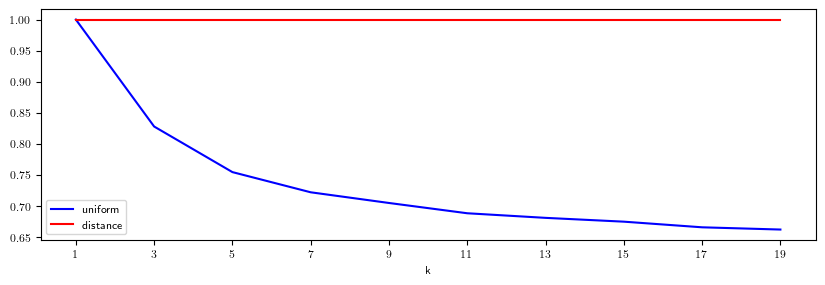

In [258]:

k_range = range (1,20,2)
scores_unif =[]
scores_dist = []
for k in k_range:
    
    # Euclidan, 'straight' distance
    knn_pipe_k_unif = make_pipeline(preprocessor_robust, KNeighborsRegressor(n_neighbors=k, weights='uniform'))
    knn_pipe_k_unif.fit(X_train, y_train)
    scores_unif.append(knn_pipe_k_unif.score(X_train, y_train))

    # Distance is inversely proportional (to lessen the weight of outliers)
    knn_pipe_k_dist = make_pipeline(preprocessor_robust, KNeighborsRegressor(n_neighbors=k, weights='distance'))
    knn_pipe_k_dist.fit(X_train, y_train)
    scores_dist.append(knn_pipe_k_dist.score(X_train, y_train))

uniform = np.array(scores_unif)
distance = np.array(scores_dist)

plt.rcParams['figure.figsize'] = [10, 3]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.plot(k_range, uniform, label='uniform', color='blue')
plt.plot(k_range, distance, label='distance', color='red')
plt.legend()
plt.xlabel("k")
plt.gca().set_xticks(k_range)
plt.show()